In [1]:
# Import libraries
import pandas as pd
import numpy as np

# inverse the order
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
import plotly.plotly as py

In [2]:
# 1. Data Preparation 
fifa = pd.read_csv('C:/Users/prono/Desktop/CompleteDataset.csv', low_memory=False)

In [3]:
fifa.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [4]:
# Selecting only the relevant columns for our analysis preprocessing
attributes = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Preferred Positions'
]
data = pd.DataFrame(fifa, columns = attributes)

In [5]:
# data summary of top 5 players
data.head()

Name  Age Nationality  Overall  Potential  \
0  Cristiano Ronaldo   32    Portugal       94         94   
1           L. Messi   30   Argentina       93         93   
2             Neymar   25      Brazil       92         94   
3          L. Suárez   30     Uruguay       92         92   
4           M. Neuer   31     Germany       92         92   

                  Club   Value   Wage Preferred Positions  
0       Real Madrid CF  €95.5M  €565K              ST LW   
1         FC Barcelona   €105M  €565K                 RW   
2  Paris Saint-Germain   €123M  €280K                 LW   
3         FC Barcelona    €97M  €510K                 ST   
4     FC Bayern Munich    €61M  €230K                 GK

In [6]:
# data summary of bottom 5 players
data.tail()

Name  Age Nationality  Overall  Potential               Club  \
17976      A. Kelsey   17     England       46         63  Scunthorpe United   
17977  B. Richardson   47     England       46         46  Wycombe Wanderers   
17978       J. Young   17    Scotland       46         61       Swindon Town   
17979   J. Lundstram   18     England       46         64    Crewe Alexandra   
17980      L. Sackey   18       Ghana       46         64  Scunthorpe United   

      Value Wage Preferred Positions  
17976  €50K  €1K                 GK   
17977    €0  €1K                 GK   
17978  €60K  €1K                 ST   
17979  €60K  €1K                 CM   
17980  €50K  €1K              ST CB

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Nationality            17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Preferred Positions    17981 non-null object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


In [8]:
# Preprocess Data
# we observe that Value & Wage aren't numeric, so we shall convert them from strings to numeric
def str2num(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
data['Worth'] = data['Value'].apply(lambda x: str2num(x))
data['Salary'] = data['Wage'].apply(lambda x: str2num(x))

In [9]:
# For simplification, splitting the first part (L, C, R) of preferred positions string
data['Position'] = data['Preferred Positions'].str.split().str[0]

In [10]:
data.head()

Name  Age Nationality  Overall  Potential  \
0  Cristiano Ronaldo   32    Portugal       94         94   
1           L. Messi   30   Argentina       93         93   
2             Neymar   25      Brazil       92         94   
3          L. Suárez   30     Uruguay       92         92   
4           M. Neuer   31     Germany       92         92   

                  Club   Value   Wage Preferred Positions        Worth  \
0       Real Madrid CF  €95.5M  €565K              ST LW    95500000.0   
1         FC Barcelona   €105M  €565K                 RW   105000000.0   
2  Paris Saint-Germain   €123M  €280K                 LW   123000000.0   
3         FC Barcelona    €97M  €510K                 ST    97000000.0   
4     FC Bayern Munich    €61M  €230K                 GK    61000000.0   

     Salary Position  
0  565000.0       ST  
1  565000.0       RW  
2  280000.0       LW  
3  510000.0       ST  
4  230000.0       GK

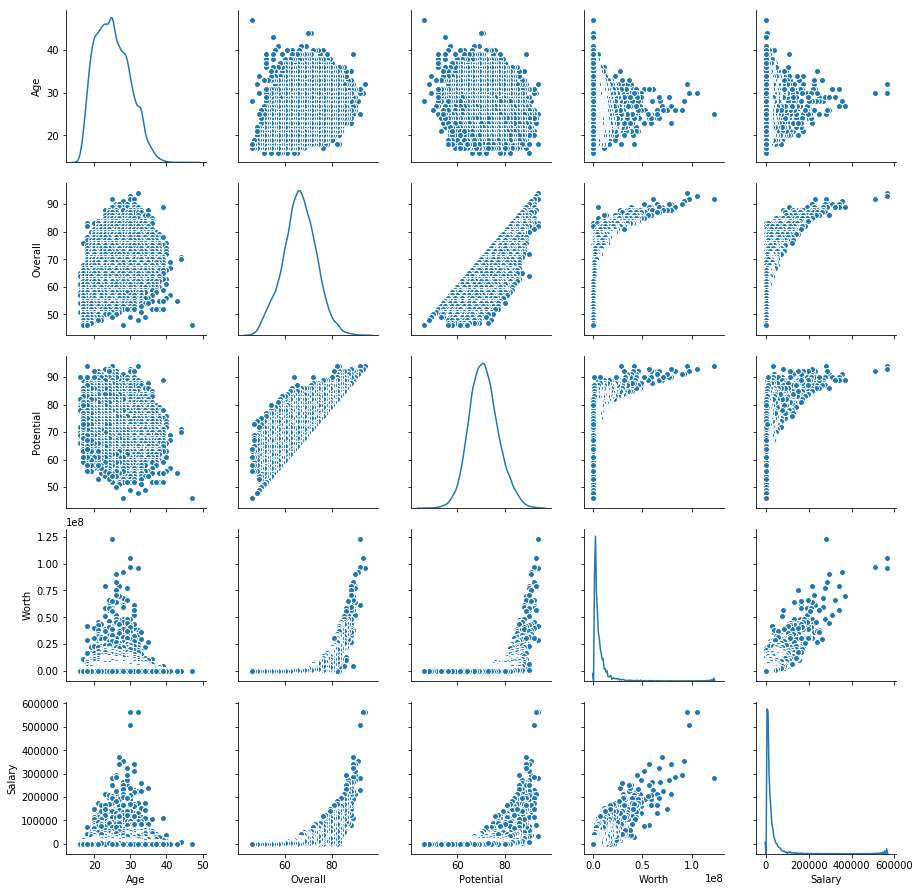

In [11]:
#plotting a scatter matrix for the numeric attributes to check their relations
relation = data[['Age','Overall','Potential','Worth','Salary']] 
sns.pairplot(relation, diag_kind="kde")

In [12]:
# 2. Data Visualization

# 2.0 Dashboard using Dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

In [13]:
# subsetting into nationality and overall
nation = data[['Nationality','Overall']]
#nation

In [14]:
# to view list
#list(nation['Overall'].groupby(nation['Nationality']))

# grouping by countries and taking mean of overall
nation1 = nation['Overall'].groupby(nation['Nationality']).mean()

In [15]:
# nation becomes the index, so printing that
#nation1.index
# overall becomes the value
#nation1.values

In [16]:
# defining the dash app
app = dash.Dash()

# giving a title for the app that would appear on the tab
app.title = 'FIFA2018'

# defining the bg & text color
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

# Applying Boostrap CSS to dash app
app.css.append_css({'external_url': 'https://codepen.io/amyoshino/pen/jzXypZ.css'})

In [17]:
# defining app layout
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    # 1st div row is for the app heading
    html.Div([
        html.H1(
            children='FIFA 2018',
            style={
                'textAlign': 'center',
                'color': colors['text']
            }
        ),

        html.Div(children='Simple Dashboard for FIFA18', style={
            'textAlign': 'center',
            'color': colors['text']
        })
    ], className = "row"),
    
    # 2nd div row is for plotting age vs value & age vs overall relationship
    html.Div([
        html.Div([
            dcc.Graph(
                id='age_vs_value',
                figure={
                    'data': [
                        go.Bar(
                            x=data['Age'],
                            y=data['Worth'].values/100000
                        )
                    ],
                    'layout': go.Layout(
                        xaxis={'title': 'Age of Players'},
                        yaxis={'title': 'Value of Players'},
                        hovermode='closest'
                    )
                }
            )
        ], className = "six columns"),
        
        html.Div([
            dcc.Graph(
                id='age_vs_overall',
                figure={
                    'data': [
                        go.Scatter(
                            x=data['Overall'],
                            y=data['Age'],
                            text=data['Name'],
                            mode='markers',
                            opacity=0.7,
                            marker={
                                'size': 15,
                                'color': 'orange',
                                'line': {'width': 0.5, 'color': 'black'},
                            },
                        )
                    ],
                    'layout': go.Layout(
                        xaxis={'title': 'Overall of Players'},
                        yaxis={'title': 'Age of Players'},
                        hovermode='closest'
                    )
                }
            )
        ], className = "six columns")
        
    ], className = "row"),
    
    # 3rd div row is for plotting value vs wage & nationality overall
    html.Div([
        html.Div([
            dcc.Graph(
                id='value_vs_wage',
                figure={
                    'data': [
                        go.Bar(
                            # /100000 because worth in million
                            x=data['Worth'].values/100000,
                            # /500 because salary in thousands
                            y=data['Salary'].values/500,
                            marker={
                                'color': 'green'
                            }
                        )
                    ],
                    'layout': go.Layout(
                        xaxis={'title': 'Value of Players'},
                        yaxis={'title': 'Wage of Players'},
                        hovermode='closest'
                    )
                }
            )
        ], className = "six columns"),
        
        html.Div([
            dcc.Graph(
                id='nationality_vs_overall',
                figure={
                    'data': [ 
                        go.Choropleth(        
                        dict(
                                locationmode = 'country names',
                                locations = nation1.index,
                                z = nation1.values,
                                colorscale = 'Viridis',
                                autocolorscale = False,
                                reversescale = True,
                              )
                        )],

                        'layout': dict(
                            title = 'Countries by their Player Overall',
                            geo = dict(
                                showframe = False,
                                showcoastlines = False,
                                projection = dict(
                                    type = 'Mercator'
                                )
                            )
                        )
                }
            )
        ], className="six columns")
             
    ], className = "row")
])

In [19]:
# this is to run the app on local host
if __name__ == '__main__':
    app.run_server(debug=False)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [03/Sep/2018 08:35:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Sep/2018 08:35:26] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/Sep/2018 08:35:26] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/Sep/2018 08:35:26] "GET /favicon.ico HTTP/1.1" 200 -


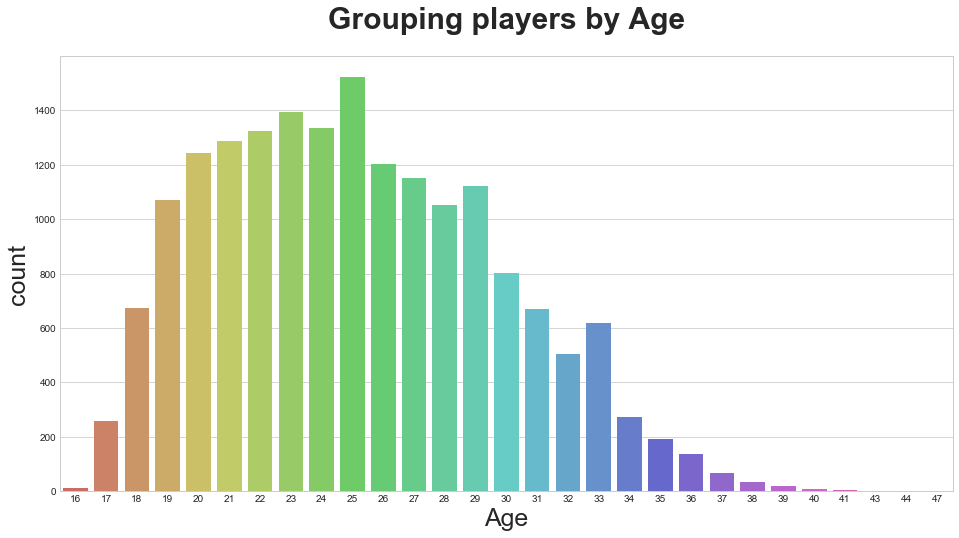

In [20]:
# 2.1 - Age
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x=data.Age, palette="hls");
plt.show()

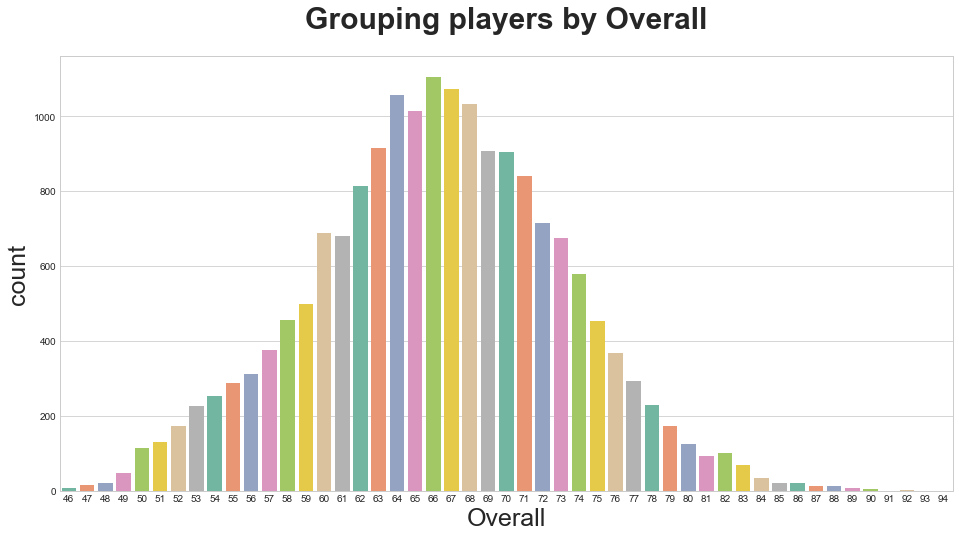

In [21]:
# 2.2 Overall
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Overall', fontsize=25)
sns.countplot(x=data.Overall, palette="Set2");
plt.show()

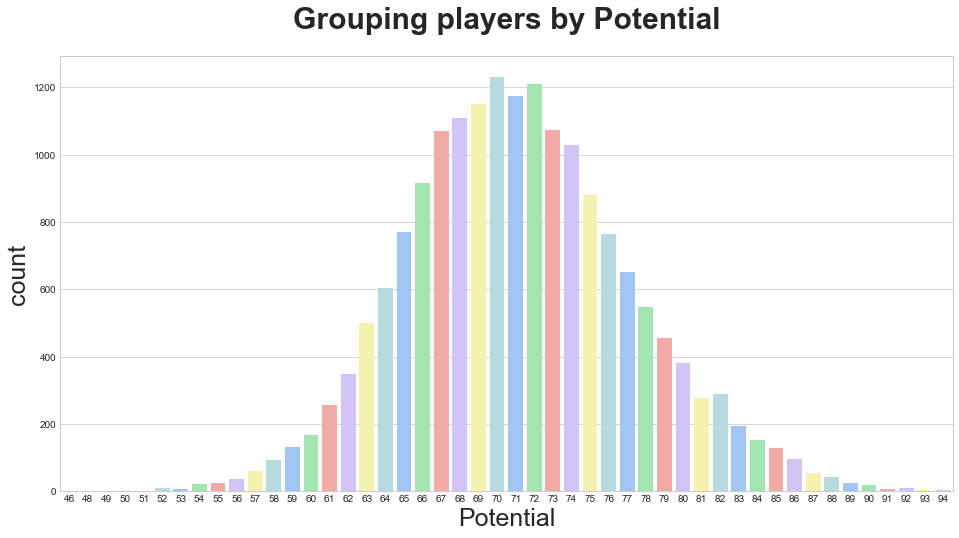

In [22]:
# 2.3 Potential
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Potential', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Potential', fontsize=25)
sns.countplot(x=data.Potential, palette="pastel");
plt.show()

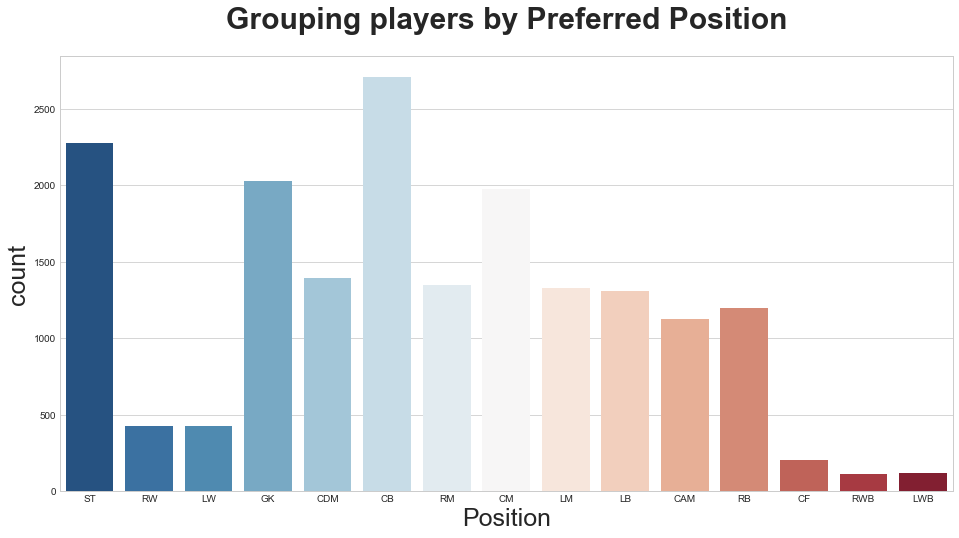

In [23]:
# 2.4 Preferred Position
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preferred Position', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Position', fontsize=25)
sns.countplot(x=data.Position, palette="RdBu_r");
plt.show()

In [24]:
# 2.5 Nationality
# Grouping the data by countries
valcon = data.groupby("Nationality").size().reset_index(name="Count")

# Plotting the choropleth map
init_notebook_mode()
plotmap = [ dict(
        type = 'choropleth',
        locations = valcon["Nationality"],
        locationmode = 'country names',
        z = valcon["Count"],
        text = valcon["Nationality"],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = "Amount of Players"),
      ) ]

layout = dict(
    title = "Nationalities of FIFA 18 Players",
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'mercator'
        )
    )
)

fig = dict( data=plotmap, layout=layout )
iplot(fig)

In [25]:
data["Nationality"].value_counts().head(25)

England                1630
Germany                1140
Spain                  1019
France                  978
Argentina               965
Brazil                  812
Italy                   799
Colombia                592
Japan                   469
Netherlands             429
Republic of Ireland     417
United States           381
Chile                   375
Sweden                  368
Portugal                367
Mexico                  360
Denmark                 346
Poland                  337
Norway                  333
Korea Republic          330
Saudi Arabia            329
Russia                  306
Scotland                300
Turkey                  291
Belgium                 272
Name: Nationality, dtype: int64

In [26]:
# Players are more centralized in Europe. To be precise, England, Germany, Spain, and France.
# 2.6 Value
sorted_players = data.sort_values(["Worth"], ascending=False).head(20)
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Value"]].values

In [27]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Value</th></tr>{}</table>'.format(table_content))
)

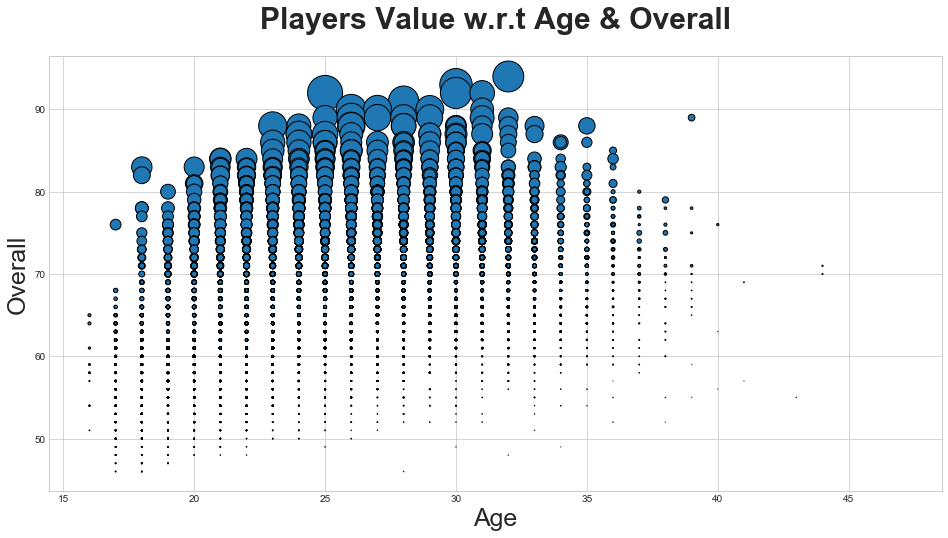

In [28]:
# Scatter chart of players' Value w.r.t their Age & Overall:

plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value w.r.t Age & Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = data["Age"].values
overall = data["Overall"].values
worth = data["Worth"].values

plt.scatter(age, overall, s = worth/100000, edgecolors='black')
plt.show()

In [29]:
# 2.7 Wage
sorted_players = data.sort_values(["Salary"], ascending=False).head(20)
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Wage"]].values

In [30]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Wage</th></tr>{}</table>'.format(table_content))
)

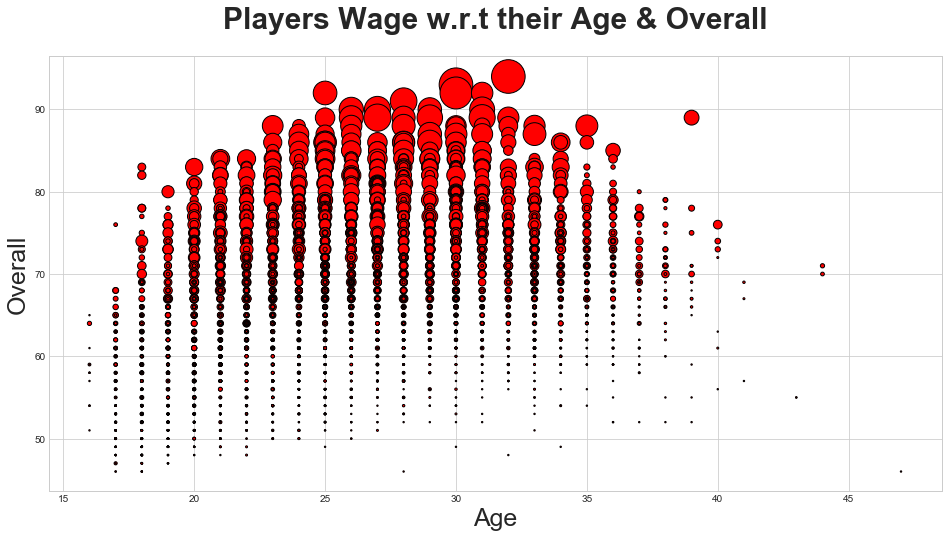

In [31]:
# Scatter chart of the players' Wage w.r.t their Age & Overall:

plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage w.r.t their Age & Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = data["Age"].values
overall = data["Overall"].values
salary = data["Salary"].values

plt.scatter(age, overall, s = salary/500, edgecolors='black', color="red")
plt.show()

In [32]:
# 3 Best Squad Analysis
# Taking only required columns data
data = data[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Position', 'Value', 'Wage']]

In [33]:
data.head(10)

Name  Age Nationality  Overall  Potential  \
0  Cristiano Ronaldo   32    Portugal       94         94   
1           L. Messi   30   Argentina       93         93   
2             Neymar   25      Brazil       92         94   
3          L. Suárez   30     Uruguay       92         92   
4           M. Neuer   31     Germany       92         92   
5     R. Lewandowski   28      Poland       91         91   
6             De Gea   26       Spain       90         92   
7          E. Hazard   26     Belgium       90         91   
8           T. Kroos   27     Germany       90         90   
9         G. Higuaín   29   Argentina       90         90   

                  Club Position   Value   Wage  
0       Real Madrid CF       ST  €95.5M  €565K  
1         FC Barcelona       RW   €105M  €565K  
2  Paris Saint-Germain       LW   €123M  €280K  
3         FC Barcelona       ST    €97M  €510K  
4     FC Bayern Munich       GK    €61M  €230K  
5     FC Bayern Munich       ST    €92M  €355K  
6    Manchester United       GK  €64.5M  €215K  
7              Chelsea       LW  €90.5M  €295K  
8       Real Madrid CF      CDM    €79M  €340K  
9             Juventus       ST    €77M  €275K

In [34]:
# 3.1 Squad of Highest Overall Players
# Checking for best player squad according to FIFA 18 based on overall rating

def get_best_squad(formation):
    data_copy = data.copy()
    store = []
    
    # iterate through all player positions in the formation inputted & get players with highest overall w.r.t position
    for i in formation:
        store.append([
            i,
            data_copy.loc[[data_copy[data_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False),
            data_copy[data_copy['Position'] == i]['Overall'].max(),
            data_copy.loc[[data_copy[data_copy['Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index = False),
            data_copy.loc[[data_copy[data_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False),
            data_copy.loc[[data_copy[data_copy['Position'] == i]['Overall'].idxmax()]]['Value'].to_string(index = False),
            data_copy.loc[[data_copy[data_copy['Position'] == i]['Overall'].idxmax()]]['Wage'].to_string(index = False)
        ])
                      
        data_copy.drop(data_copy[data_copy['Position'] == i]['Overall'].idxmax(), inplace = True)
    
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', 'Overall', 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [35]:
# 4-3-3
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position             Player Overall Age                 Club   Value   Wage
     GK           M. Neuer      92  31     FC Bayern Munich    €61M  €230K
     RB           Carvajal      84  25       Real Madrid CF    €32M  €195K
     CB       Sergio Ramos      90  31       Real Madrid CF    €52M  €310K
     CB       G. Chiellini      89  32             Juventus    €38M  €225K
     LB            Marcelo      87  29       Real Madrid CF    €38M  €250K
    CDM           T. Kroos      90  27       Real Madrid CF    €79M  €340K
     CM           N. Kanté      87  26              Chelsea  €52.5M  €190K
    CAM           Coutinho      86  25            Liverpool    €56M  €205K
     RW           L. Messi      93  30         FC Barcelona   €105M  €565K
     ST  Cristiano Ronaldo      94  32       Real Madrid CF  €95.5M  €565K
     LW             Neymar      92  25  Paris Saint-Germain   €123M  €280K


In [36]:
# 4-4-2
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position             Player Overall Age               Club   Value   Wage
     GK           M. Neuer      92  31   FC Bayern Munich    €61M  €230K
     RB           Carvajal      84  25     Real Madrid CF    €32M  €195K
     CB       Sergio Ramos      90  31     Real Madrid CF    €52M  €310K
     CB       G. Chiellini      89  32           Juventus    €38M  €225K
     LB            Marcelo      87  29     Real Madrid CF    €38M  €250K
     RM       K. De Bruyne      89  26    Manchester City    €83M  €285K
     CM           N. Kanté      87  26            Chelsea  €52.5M  €190K
     CM           A. Vidal      87  30   FC Bayern Munich  €37.5M  €160K
     LM         C. Eriksen      87  25  Tottenham Hotspur    €65M  €165K
     ST  Cristiano Ronaldo      94  32     Real Madrid CF  €95.5M  €565K
     ST          L. Suárez      92  30       FC Barcelona    €97M  €510K


In [37]:
# 4-2-3-1
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position             Player Overall Age              Club   Value   Wage
     GK           M. Neuer      92  31  FC Bayern Munich    €61M  €230K
     RB           Carvajal      84  25    Real Madrid CF    €32M  €195K
     CB       Sergio Ramos      90  31    Real Madrid CF    €52M  €310K
     CB       G. Chiellini      89  32          Juventus    €38M  €225K
     LB            Marcelo      87  29    Real Madrid CF    €38M  €250K
    CDM           T. Kroos      90  27    Real Madrid CF    €79M  €340K
    CDM          L. Modrić      89  31    Real Madrid CF    €57M  €340K
    CAM           Coutinho      86  25         Liverpool    €56M  €205K
    CAM      R. Nainggolan      86  29              Roma  €42.5M  €130K
    CAM      Cesc Fàbregas      86  30           Chelsea    €41M  €210K
     ST  Cristiano Ronaldo      94  32    Real Madrid CF  €95.5M  €565K


Studying different squad's impact on National teams. 
Modifying above 'get_best_squad' function for Nationality. Also, defining 'get_summary' function to give us the squad details

In [38]:
def get_best_squad_n(formation, nationality, measurement = 'Overall'):
    data_copy = data.copy()
    data_copy = data_copy[data_copy['Nationality'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            data_copy.loc[[data_copy[data_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            data_copy.loc[[data_copy[data_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            data_copy[data_copy['Position'].str.contains(i)][measurement].max(),
            data_copy.loc[[data_copy[data_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            data_copy.loc[[data_copy[data_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            data_copy.loc[[data_copy[data_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            data_copy.loc[[data_copy[data_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        
        data_copy.drop(data_copy[data_copy['Position'].str.contains(i)][measurement].idxmax(), inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [39]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall')
            
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'Potential')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    
    return summary

In [40]:
# Applying strict rules for squad choices:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [41]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

In [42]:
Country = input('Enter the Country name: ')
Location = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, [Country])).reshape(-1,4), 
                      columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Location.set_index('Nationality', inplace = True)
Location[['Overall', 'Potential']] = Location[['Overall', 'Potential']].astype(float)

print (Country)
print (Location)

Enter the Country name: France
France
               Squad  Overall  Potential
Nationality                             
France         3-4-3    84.55      89.55
France         4-4-2    84.00      89.91
France       4-3-1-2    84.55      89.64
France         4-3-3    84.64      89.91
France       4-2-3-1    84.55      89.91


(1) Find the Teams Overall Rating according to best squad analysis

In [43]:
option1 = input('''
Please type in the squad formation option based on Current Overall ratings:
1 ->> 3-4-3
2 ->> 4-4-2
3 ->> 4-3-1-2
4 ->> 4-3-3
5 ->> 4-2-3-1
''')

if option1 == '1':
    rating_343_Overall, best_list_343_Overall = get_best_squad_n(squad_343_strict, Country, 'Overall')
    print('-Overall-')
    print('Average rating: {:.1f}'.format(rating_343_Overall))
    print(best_list_343_Overall)

elif option1 == '2':
    rating_442_Overall, best_list_442_Overall = get_best_squad_n(squad_442_strict, Country, 'Overall')
    print('-Overall-')
    print('Average rating: {:.1f}'.format(rating_442_Overall))
    print(best_list_442_Overall)

elif option1 == '3':
    rating_4312_Overall, best_list_4312_Overall = get_best_squad_n(squad_4312_strict, Country, 'Overall')
    print('-Overall-')
    print('Average rating: {:.1f}'.format(rating_4312_Overall))
    print(best_list_4312_Overall)

elif option1 == '4':
    rating_433_Overall, best_list_433_Overall = get_best_squad_n(squad_433_strict, Country, 'Overall')
    print('-Overall-')
    print('Average rating: {:.1f}'.format(rating_433_Overall))
    print(best_list_433_Overall)

elif option1 == '5':
    rating_4231_Overall, best_list_4231_Overall = get_best_squad_n(squad_4231_strict, Country, 'Overall')
    print('-Overall-')
    print('Average rating: {:.1f}'.format(rating_4231_Overall))
    print(best_list_4231_Overall)
    
else:
    print('Invalid Option.')


Please type in the squad formation option based on Current Overall ratings:
1 ->> 3-4-3
2 ->> 4-4-2
3 ->> 4-3-1-2
4 ->> 4-3-3
5 ->> 4-2-3-1
2
-Overall-
Average rating: 84.0
Position        Player Overall Age                     Club   Value   Wage
     GK     H. Lloris      88  30        Tottenham Hotspur    €38M  €165K
     RB      K. Zouma      79  22               Stoke City    €15M   €96K
     CB     R. Varane      85  24           Real Madrid CF  €46.5M  €175K
     CB    A. Laporte      84  23  Athletic Club de Bilbao  €35.5M   €36K
     LB    L. Kurzawa      80  24      Paris Saint-Germain  €16.5M   €69K
     RM    F. Thauvin      82  24   Olympique de Marseille    €28M   €40K
     CM      N. Kanté      87  26                  Chelsea  €52.5M  €190K
     CM    B. Matuidi      85  30                 Juventus  €28.5M  €145K
     LM      T. Lemar      83  21                AS Monaco  €38.5M   €37K
     ST    K. Benzema      86  29           Real Madrid CF  €44.5M  €295K
     ST  A.

(2) Find the Teams Potential Rating according to best squad analysis

In [44]:
option2 = input('''
Please type in the squad formation option based on Future Potential ratings:
1 ->> 3-4-3
2 ->> 4-4-2
3 ->> 4-3-1-2
4 ->> 4-3-3
5 ->> 4-2-3-1
''')

if option2 == '1':
    rating_343_Potential, best_list_343_Potential = get_best_squad_n(squad_343_strict, Country, 'Potential')
    print('-Potential-')
    print('Average rating: {:.1f}'.format(rating_343_Potential))
    print(best_list_343_Potential)

elif option2 == '2':
    rating_442_Potential, best_list_442_Potential = get_best_squad_n(squad_442_strict, Country, 'Potential')
    print('-Potential-')
    print('Average rating: {:.1f}'.format(rating_442_Potential))
    print(best_list_442_Potential)

elif option2 == '3':
    rating_4312_Potential, best_list_4312_Potential = get_best_squad_n(squad_4312_strict, Country, 'Potential')
    print('-Potential-')
    print('Average rating: {:.1f}'.format(rating_4312_Potential))
    print(best_list_4312_Potential)

elif option2 == '4':
    rating_433_Potential, best_list_433_Potential = get_best_squad_n(squad_433_strict, Country, 'Potential')
    print('-Potential-')
    print('Average rating: {:.1f}'.format(rating_433_Potential))
    print(best_list_433_Potential)

elif option2 == '5':
    rating_4231_Potential, best_list_4231_Potential = get_best_squad_n(squad_4231_strict, Country, 'Potential')
    print('-Potential-')
    print('Average rating: {:.1f}'.format(rating_4231_Potential))
    print(best_list_4231_Potential)
    
else:
    print('Invalid Option.')


Please type in the squad formation option based on Future Potential ratings:
1 ->> 3-4-3
2 ->> 4-4-2
3 ->> 4-3-1-2
4 ->> 4-3-3
5 ->> 4-2-3-1
4
-Potential-
Average rating: 89.9
Position        Player Potential Age                     Club   Value   Wage
     GK     A. Lafont        89  18              Toulouse FC  €11.5M   €10K
     RB      K. Zouma        86  22               Stoke City    €15M   €96K
     CB     R. Varane        92  24           Real Madrid CF  €46.5M  €175K
     CB    A. Laporte        89  23  Athletic Club de Bilbao  €35.5M   €36K
     LB  L. Hernández        88  21          Atlético Madrid  €13.5M   €36K
    CDM      P. Pogba        92  24        Manchester United  €66.5M  €195K
    CAM    O. Dembélé        92  20             FC Barcelona    €40M  €150K
     CM      N. Kanté        90  26                  Chelsea  €52.5M  €190K
     RM       A. Pléa        86  24                 OGC Nice  €20.5M   €41K
     ST     K. Mbappé        94  18      Paris Saint-Germain  

Match Prediction Analysis

In [45]:
# 4.1 Uruguay
# Exploring different squad possibilities of Uruguay and how it affects the ratings:

Uruguay = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Uruguay'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Uruguay.set_index('Nationality', inplace = True)
Uruguay[['Overall', 'Potential']] = Uruguay[['Overall', 'Potential']].astype(float)

print (Uruguay)

               Squad  Overall  Potential
Nationality                             
Uruguay        3-4-3    80.64      84.91
Uruguay        4-4-2    81.09      85.27
Uruguay      4-3-1-2    81.09      84.73
Uruguay        4-3-3    80.18      84.91
Uruguay      4-2-3-1    79.82      84.27


In [46]:
# Uruguay currently, has the best 4-4-2 & 4-3-1-2 squad formations acc to Overall; 
# Also, 4-4-2 is the best for future squad w.r.t team's potential ratings.

# Checking the top 11 squad line-up of Uruguay in 4-3-1-2 for overall rating:
rating_4312_UY_Overall, best_list_4312_UY_Overall = get_best_squad_n(squad_4312_strict, 'Uruguay', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_UY_Overall))
print(best_list_4312_UY_Overall)

-Overall-
Average rating: 81.1
Position         Player Overall Age                 Club   Value   Wage
     GK     F. Muslera      82  31       Galatasaray SK  €13.5M   €57K
     RB     M. Cáceres      77  30        Hellas Verona   €6.5M   €28K
     CB       D. Godín      88  31      Atlético Madrid    €40M  €125K
     CB     J. Giménez      83  22      Atlético Madrid  €28.5M   €53K
     LB       F. Ricca      74  22            Málaga CF     €7M   €18K
    CDM      M. Vecino      78  25                Inter    €13M   €59K
    CDM       M. Lemos      77  21        UD Las Palmas  €10.5M   €17K
     CM  S. Cristóforo      76  23           Fiorentina   €8.5M   €48K
     CF     N. Lodeiro      78  28  Seattle Sounders FC  €10.5M   €11K
     ST      L. Suárez      92  30         FC Barcelona    €97M  €510K
     ST      E. Cavani      87  30  Paris Saint-Germain  €48.5M  €160K


In [47]:
# Checking the top 11 squad line-up of Uruguay in 4-4-2 for potential rating:

rating_442_UY_Potential, best_list_442_UY_Potential = get_best_squad_n(squad_442_strict, 'Uruguay', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_UY_Potential))
print(best_list_442_UY_Potential)

-Potential-
Average rating: 85.3
Position       Player Potential Age                       Club   Value   Wage
     GK   F. Muslera        82  31             Galatasaray SK  €13.5M   €57K
     RB  C. González        82  20           Sevilla Atlético   €1.8M    €3K
     CB     D. Godín        88  31            Atlético Madrid    €40M  €125K
     CB   J. Giménez        87  22            Atlético Madrid  €28.5M   €53K
    LWB  M. Saracchi        85  19                River Plate   €3.4M    €7K
     RM  F. Valverde        85  18  RC Deportivo de La Coruña   €3.6M   €44K
     CM    N. Nández        85  21               Boca Juniors   €3.5M   €11K
     CM  L. Torreira        83  21                  Sampdoria    €10M   €26K
     LM    D. Laxalt        82  24                      Genoa  €13.5M   €30K
     ST    L. Suárez        92  30               FC Barcelona    €97M  €510K
     ST    E. Cavani        87  30        Paris Saint-Germain  €48.5M  €160K


In [48]:
# 4.2 France
# Exploring different squad possibilities of France and their respective ratings. First for Overall then for Potential:

France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)

print (France)

               Squad  Overall  Potential
Nationality                             
France         3-4-3    84.55      89.55
France         4-4-2    84.00      89.91
France       4-3-1-2    84.55      89.64
France         4-3-3    84.64      89.91
France       4-2-3-1    84.55      89.91


In [49]:
# France's current overall ratings are high for 4-3-3 squad formation; 
# Whereas 4-4-2, 4-3-3, and 4-2-3-1 are best squad options based on potential ratings.

# Displaying France's best 11 squad with 4-3-3 for overall ratings.
rating_433_FR_Overall, best_list_433_FR_Overall = get_best_squad_n(squad_433_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
print(best_list_433_FR_Overall)

-Overall-
Average rating: 84.6
Position        Player Overall Age                     Club   Value   Wage
     GK     H. Lloris      88  30        Tottenham Hotspur    €38M  €165K
     RB      K. Zouma      79  22               Stoke City    €15M   €96K
     CB     R. Varane      85  24           Real Madrid CF  €46.5M  €175K
     CB    A. Laporte      84  23  Athletic Club de Bilbao  €35.5M   €36K
     LB    L. Kurzawa      80  24      Paris Saint-Germain  €16.5M   €69K
     CM      N. Kanté      87  26                  Chelsea  €52.5M  €190K
    CDM      P. Pogba      87  24        Manchester United  €66.5M  €195K
     CM    B. Matuidi      85  30                 Juventus  €28.5M  €145K
     RM    F. Thauvin      82  24   Olympique de Marseille    €28M   €40K
     ST    K. Benzema      86  29           Real Madrid CF  €44.5M  €295K
     LW  A. Griezmann      88  26          Atlético Madrid    €75M  €150K


In [50]:
# Displaying France's best 11 squad with 4-3-3 for potential ratings.
rating_433_FR_Potential, best_list_433_FR_Potential = get_best_squad_n(squad_433_strict, 'France', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_FR_Potential))
print(best_list_433_FR_Potential)

-Potential-
Average rating: 89.9
Position        Player Potential Age                     Club   Value   Wage
     GK     A. Lafont        89  18              Toulouse FC  €11.5M   €10K
     RB      K. Zouma        86  22               Stoke City    €15M   €96K
     CB     R. Varane        92  24           Real Madrid CF  €46.5M  €175K
     CB    A. Laporte        89  23  Athletic Club de Bilbao  €35.5M   €36K
     LB  L. Hernández        88  21          Atlético Madrid  €13.5M   €36K
    CDM      P. Pogba        92  24        Manchester United  €66.5M  €195K
    CAM    O. Dembélé        92  20             FC Barcelona    €40M  €150K
     CM      N. Kanté        90  26                  Chelsea  €52.5M  €190K
     RM       A. Pléa        86  24                 OGC Nice  €20.5M   €41K
     ST     K. Mbappé        94  18      Paris Saint-Germain  €41.5M   €31K
     LW  A. Griezmann        91  26          Atlético Madrid    €75M  €150K


In [51]:
# 4.3 Brazil
# Exploring different squad possibilities of Brazil and their respective ratings:

Brazil = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Brazil'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Brazil.set_index('Nationality', inplace = True)
Brazil[['Overall', 'Potential']] = Brazil[['Overall', 'Potential']].astype(float)

print (Brazil)

               Squad  Overall  Potential
Nationality                             
Brazil         3-4-3    85.36      88.45
Brazil         4-4-2    84.73      88.00
Brazil       4-3-1-2    84.64      88.00
Brazil         4-3-3    85.45      88.73
Brazil       4-2-3-1    85.36      88.73


In [52]:
# Brazil does best for 4-3-3 w.r.t. overall & for either 4-3-3 or 4-2-3-1 w.r.t. potential rating. 

# Selecting 4-3-3 for the overall ratings
rating_433_BRA_Overall, best_list_433_BRA_Overall = get_best_squad_n(squad_433_strict, 'Brazil', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BRA_Overall))
print(best_list_433_BRA_Overall)

-Overall-
Average rating: 85.5
Position         Player Overall Age                 Club   Value   Wage
     GK        Ederson      83  23      Manchester City    €26M   €87K
     RB     Dani Alves      84  34  Paris Saint-Germain     €9M  €115K
     CB   Thiago Silva      88  32  Paris Saint-Germain    €34M  €175K
     CB     David Luiz      86  30              Chelsea    €33M  €190K
     LB        Marcelo      87  29       Real Madrid CF    €38M  €250K
    CDM       Casemiro      85  25       Real Madrid CF    €42M  €195K
    CAM       Coutinho      86  25            Liverpool    €56M  €205K
    CAM        Willian      84  28              Chelsea  €31.5M  €200K
     RM  Douglas Costa      82  26             Juventus    €24M  €115K
     CF          Jonas      83  33           SL Benfica  €16.5M   €21K
     LW         Neymar      92  25  Paris Saint-Germain   €123M  €280K


In [53]:
# Selecting 4-2-3-1 for the potential ratings
rating_4231_BRA_Potential, best_list_4231_BRA_Potential = get_best_squad_n(squad_4231_strict, 'Brazil', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_BRA_Potential))
print(best_list_4231_BRA_Potential)

-Potential-
Average rating: 88.7
Position         Player Potential Age                   Club   Value   Wage
     GK        Ederson        89  23        Manchester City    €26M   €87K
     RB     Dani Alves        84  34    Paris Saint-Germain     €9M  €115K
     CB     Marquinhos        89  23    Paris Saint-Germain  €30.5M   €75K
     CB   Thiago Silva        88  32    Paris Saint-Germain    €34M  €175K
     LB        Marcelo        87  29         Real Madrid CF    €38M  €250K
    CDM       Casemiro        89  25         Real Madrid CF    €42M  €195K
    CDM        Fabinho        88  23              AS Monaco  €29.5M   €37K
     RM         Malcom        87  20  Girondins de Bordeaux  €24.5M   €47K
    CAM       Coutinho        89  25              Liverpool    €56M  €205K
     LW         Neymar        94  25    Paris Saint-Germain   €123M  €280K
     ST  Gabriel Jesus        92  20        Manchester City    €31M  €115K


In [54]:
# 4.4 Belgium
# Exploring different squad possibilities of Belgium and their respective ratings:

Belgium = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Belgium'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Belgium.set_index('Nationality', inplace = True)
Belgium[['Overall', 'Potential']] = Belgium[['Overall', 'Potential']].astype(float)

print (Belgium)

               Squad  Overall  Potential
Nationality                             
Belgium        3-4-3    83.91      86.55
Belgium        4-4-2    83.36      86.73
Belgium      4-3-1-2    83.09      86.09
Belgium        4-3-3    84.27      87.27
Belgium      4-2-3-1    84.00      87.00


In [55]:
# 4-3-3 formation is the best option for Belgium's both current and future squad.

# Selecting 4-3-3 for overall ratings
rating_433_BEL_Overall, best_list_433_BEL_Overall = get_best_squad_n(squad_433_strict, 'Belgium', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Overall))
print(best_list_433_BEL_Overall)

-Overall-
Average rating: 84.3
Position           Player Overall Age               Club   Value   Wage
     GK      T. Courtois      89  25            Chelsea    €59M  €190K
     RB         T. Foket      73  22           KAA Gent   €5.5M   €19K
     CB  T. Alderweireld      86  28  Tottenham Hotspur  €40.5M  €165K
     CB    J. Vertonghen      85  30  Tottenham Hotspur  €28.5M  €130K
     LB     T. Vermaelen      78  31       FC Barcelona     €7M  €120K
    CDM       M. Dembélé      83  29  Tottenham Hotspur    €25M  €115K
    CAM    R. Nainggolan      86  29               Roma  €42.5M  €130K
    CAM        A. Witsel      82  28                NaN      €0     €0
     RM     K. De Bruyne      89  26    Manchester City    €83M  €285K
     ST        R. Lukaku      86  24  Manchester United    €59M  €210K
     LW        E. Hazard      90  26            Chelsea  €90.5M  €295K


In [56]:
# Selecting 4-3-3 for potential ratings
rating_433_BEL_Potential, best_list_433_BEL_Potential = get_best_squad_n(squad_433_strict, 'Belgium', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Potential))
print(best_list_433_BEL_Potential)

-Potential-
Average rating: 87.3
Position           Player Potential Age               Club   Value   Wage
     GK      T. Courtois        92  25            Chelsea    €59M  €190K
     RB         T. Foket        79  22           KAA Gent   €5.5M   €19K
     CB  T. Alderweireld        87  28  Tottenham Hotspur  €40.5M  €165K
     CB    L. Dendoncker        86  22     RSC Anderlecht    €15M   €25K
     LB        J. Lukaku        83  22              Lazio    €10M   €39K
     CM          D. Rigo        84  18                PSV   €1.3M    €3K
    CAM     Y. Tielemans        90  20          AS Monaco  €23.5M   €35K
    CAM    R. Nainggolan        86  29               Roma  €42.5M  €130K
     RM     K. De Bruyne        92  26    Manchester City    €83M  €285K
     ST        R. Lukaku        90  24  Manchester United    €59M  €210K
     LW        E. Hazard        91  26            Chelsea  €90.5M  €295K


In [57]:
# 4.5 Sweden
# Exploring different squad possibilities of Sweden and their respective ratings:

Sweden = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Sweden'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Sweden.set_index('Nationality', inplace = True)
Sweden[['Overall', 'Potential']] = Sweden[['Overall', 'Potential']].astype(float)

print (Sweden)

               Squad  Overall  Potential
Nationality                             
Sweden         3-4-3    78.27      81.36
Sweden         4-4-2    78.55      82.09
Sweden       4-3-1-2    78.09      81.73
Sweden         4-3-3    78.09      81.64
Sweden       4-2-3-1    77.91      81.64


In [58]:
# Sweden does really well for 4-4-2 with their current squad and also with their potential squad.

# Selecting 4-4-2 for overall ratings:
rating_442_SWE_Overall, best_list_442_SWE_Overall = get_best_squad_n(squad_442_strict, 'Sweden', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_442_SWE_Overall))
print(best_list_442_SWE_Overall)

-Overall-
Average rating: 78.5
Position          Player Overall Age                  Club   Value   Wage
     GK     K. Johnsson      75  27  En Avant de Guingamp   €5.5M   €17K
     RB       E. Krafth      73  22               Bologna   €4.7M   €36K
     CB    A. Granqvist      80  32          FC Krasnodar   €8.5M   €50K
     CB     V. Lindelöf      79  22     Manchester United    €15M  €105K
     LB       M. Olsson      75  29          Swansea City     €5M   €55K
     RM       J. Durmaz      75  28           Toulouse FC   €6.5M   €29K
    CDM    P. Wernbloom      79  31           CSKA Moscow   €8.5M   €52K
     CM    K. Källström      77  34        Djurgårdens IF   €4.3M    €9K
     LM     E. Forsberg      83  25            RB Leipzig  €31.5M   €75K
     ST  Z. Ibrahimović      88  35     Manchester United    €27M  €240K
     CF         M. Berg      80  30                   NaN      €0     €0


In [59]:
# Selecting 4-4-2 for potential ratings:
rating_442_SWE_Potential, best_list_442_SWE_Potential = get_best_squad_n(squad_442_strict, 'Sweden', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_SWE_Potential))
print(best_list_442_SWE_Potential)

-Potential-
Average rating: 82.1
Position           Player Potential Age               Club   Value   Wage
     GK      P. Dahlberg        78  18       IFK Göteborg   €775K    €1K
     RB        E. Krafth        80  22            Bologna   €4.7M   €36K
     CB      V. Lindelöf        86  22  Manchester United    €15M  €105K
     CB     A. Granqvist        80  32       FC Krasnodar   €8.5M   €50K
     LB  L. Augustinsson        82  23   SV Werder Bremen   €5.5M   €21K
     RM      M. Svanberg        79  18           Malmö FF   €925K    €1K
    CDM     P. Wernbloom        79  31        CSKA Moscow   €8.5M   €52K
    CAM      A. Fransson        82  23           FC Basel   €5.5M   €27K
     LM      E. Forsberg        85  25         RB Leipzig  €31.5M   €75K
     ST   Z. Ibrahimović        88  35  Manchester United    €27M  €240K
     ST          A. Isak        84  17  Borussia Dortmund   €1.8M   €18K


In [60]:
# 4.6 England
# Exploring different squad possibilities of England and their respective ratings:

England = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
England.set_index('Nationality', inplace = True)
England[['Overall', 'Potential']] = England[['Overall', 'Potential']].astype(float)

print (England)

               Squad  Overall  Potential
Nationality                             
England        3-4-3    82.64      87.18
England        4-4-2    82.64      87.27
England      4-3-1-2    82.27      86.73
England        4-3-3    82.73      87.36
England      4-2-3-1    82.36      87.36


In [61]:
# England should consider 4-3-3 with their current squad and either 4-3-3 or 4-2-3-1 with their potential squad. 

# Selecting 4-3-3 for overall ratings:
rating_433_ENG_Overall, best_list_433_ENG_Overall = get_best_squad_n(squad_433_strict, 'England', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ENG_Overall))
print(best_list_433_ENG_Overall)

-Overall-
Average rating: 82.7
Position        Player Overall Age               Club   Value   Wage
     GK       J. Hart      82  30    West Ham United    €14M  €110K
    RWB     K. Walker      83  27    Manchester City    €24M  €130K
     CB     G. Cahill      84  31            Chelsea    €21M  €160K
     CB      M. Keane      81  24            Everton    €21M   €91K
    LWB       D. Rose      82  26  Tottenham Hotspur    €21M   €99K
     CM    A. Lallana      83  29          Liverpool    €25M  €135K
     CM       E. Dier      82  23  Tottenham Hotspur    €25M   €85K
     CM  J. Henderson      82  27          Liverpool  €21.5M  €115K
     RW    R. Barkley      81  23            Everton    €24M  €105K
     ST       H. Kane      86  23  Tottenham Hotspur    €59M  €165K
     LM       D. Alli      84  21  Tottenham Hotspur    €43M  €115K


In [62]:
# Selecting 4-2-3-1 for potential ratings:
rating_4231_ENG_Potential, best_list_4231_ENG_Potential = get_best_squad_n(squad_4231_strict, 'England', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_ENG_Potential))
print(best_list_4231_ENG_Potential)

-Potential-
Average rating: 87.4
Position                 Player Potential Age               Club   Value   Wage
     GK             J. Butland        87  24         Stoke City    €18M   €50K
    RWB  A. Oxlade-Chamberlain        85  23          Liverpool    €20M  €105K
     CB               M. Keane        87  24            Everton    €21M   €91K
     CB              J. Stones        85  23    Manchester City  €14.5M  €105K
     LB                L. Shaw        84  21  Manchester United    €14M   €91K
     CM               A. Gomes        90  16  Manchester United   €975K    €9K
     CM                E. Dier        87  23  Tottenham Hotspur    €25M   €85K
     RM            M. Rashford        89  19  Manchester United    €22M   €74K
    CAM             M. Edwards        87  18  Tottenham Hotspur   €1.2M   €11K
     LM                D. Alli        90  21  Tottenham Hotspur    €43M  €115K
     ST                H. Kane        90  23  Tottenham Hotspur    €59M  €165K


In [63]:
# 4.7 Russia
# Exploring different squad possibilities of Russia w.r.t ratings:

Russia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Russia'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Russia.set_index('Nationality', inplace = True)
Russia[['Overall', 'Potential']] = Russia[['Overall', 'Potential']].astype(float)

print (Russia)

               Squad  Overall  Potential
Nationality                             
Russia         3-4-3    78.36      81.00
Russia         4-4-2    78.55      81.55
Russia       4-3-1-2    78.18      81.18
Russia         4-3-3    78.27      81.45
Russia       4-2-3-1    78.18      81.27


In [64]:
# Russia does best for 4-4-2 w.r.t. overall & also, w.r.t. potential rating. 

# Selecting 4-4-2 for the overall ratings
rating_442_RUS_Overall, best_list_442_RUS_Overall = get_best_squad_n(squad_442_strict, 'Russia', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_442_RUS_Overall))
print(best_list_442_RUS_Overall)

-Overall-
Average rating: 78.5
Position           Player Overall Age                  Club   Value  Wage
     GK      S. Kritsyuk      79  26          FC Krasnodar    €11M  €40K
     RB     I. Smolnikov      79  28  Zenit St. Petersburg    €10M  €71K
     CB   V. Berezutskiy      79  35           CSKA Moscow     €3M  €37K
     CB   S. Ignashevich      78  37           CSKA Moscow   €1.4M  €31K
     LB   I. Novoseltsev      74  25  Zenit St. Petersburg     €6M  €45K
     RM  Mário Fernandes      81  26           CSKA Moscow    €17M  €52K
    CDM       I. Denisov      79  33      Lokomotiv Moscow     €5M  €50K
     CM     D. Glushakov      78  30        Spartak Moscow   €7.5M  €56K
     LM        R. Zobnin      77  23        Spartak Moscow  €10.5M  €48K
     CF       A. Dzagoev      80  27           CSKA Moscow  €16.5M  €57K
     ST        F. Smolov      80  27          FC Krasnodar  €17.5M  €59K


In [65]:
# Selecting 4-4-2 also for the potential ratings
rating_442_RUS_Potential, best_list_442_RUS_Potential = get_best_squad_n(squad_442_strict, 'Russia', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_RUS_Potential))
print(best_list_442_RUS_Potential)

-Potential-
Average rating: 81.5
Position            Player Potential Age            Club   Value  Wage
     GK       S. Kritsyuk        82  26    FC Krasnodar    €11M  €40K
     RB         G. Tigiev        80  22  Spartak Moscow   €2.5M  €29K
     CB       G. Dzhikiya        81  23  Spartak Moscow     €8M  €40K
     CB        I. Kutepov        81  23  Spartak Moscow     €5M  €40K
    LWB      E. Nabiullin        80  22     Rubin Kazan   €3.1M  €23K
     RM   Mário Fernandes        82  26     CSKA Moscow    €17M  €52K
     CM       A. Timofeev        80  23  Spartak Moscow   €1.6M  €24K
    CAM  I. Bezdenezhnykh        82  20          FC Ufa   €1.9M  €13K
     LM         R. Zobnin        84  23  Spartak Moscow  €10.5M  €48K
     CF           A. Zuev        83  21       FC Rostov   €3.4M  €29K
     ST         F. Chalov        82  19     CSKA Moscow     €2M  €16K


In [66]:
# 4.8 Croatia
# Exploring different squad possibilities of Croatia w.r.t ratings:

Croatia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Croatia'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Croatia.set_index('Nationality', inplace = True)
Croatia[['Overall', 'Potential']] = Croatia[['Overall', 'Potential']].astype(float)

print (Croatia)

               Squad  Overall  Potential
Nationality                             
Croatia        3-4-3    80.55      83.00
Croatia        4-4-2    80.82      83.00
Croatia      4-3-1-2    81.27      83.64
Croatia        4-3-3    81.64      83.91
Croatia      4-2-3-1    81.64      83.64


In [67]:
# Croatia does well for both 4-3-3 and 4-2-3-1 formations w.r.t. Overall ratings & only for 4-3-3 w.r.t. Potential Ratings

# Selecting 4-2-3-1 for overall ratings:
rating_4231_CRO_Overall, best_list_4231_CRO_Overall = get_best_squad_n(squad_4231_strict, 'Croatia', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_CRO_Overall))
print(best_list_4231_CRO_Overall)

-Overall-
Average rating: 81.6
Position        Player Overall Age              Club   Value   Wage
     GK    D. Subašić      85  32         AS Monaco    €22M   €46K
     RB       D. Srna      81  35  Shakhtar Donetsk   €3.8M    €1K
     CB    V. Ćorluka      82  31  Lokomotiv Moscow    €15M   €54K
     CB     D. Lovren      81  27         Liverpool  €17.5M  €110K
     LB    I. Strinić      75  29         Sampdoria     €5M   €31K
    CDM     L. Modrić      89  31    Real Madrid CF    €57M  €340K
     CM    I. Rakitić      87  29      FC Barcelona  €48.5M  €275K
     RM    J. Brekalo      70  19     VfB Stuttgart   €3.1M   €21K
    CAM    I. Perišić      84  28             Inter  €31.5M  €110K
     LM  M. Mandžukić      83  31          Juventus  €23.5M  €135K
     ST    N. Kalinić      81  29             Milan    €18M   €84K


In [68]:
# Selecting 4-3-3 for potential ratings
rating_433_CRO_Potential, best_list_433_CRO_Potential = get_best_squad_n(squad_433_strict, 'Croatia', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_CRO_Potential))
print(best_list_433_CRO_Potential)

-Potential-
Average rating: 83.9
Position      Player Potential Age                 Club   Value   Wage
     GK  D. Subašić        85  32            AS Monaco    €22M   €46K
     RB   T. Jedvaj        84  21  Bayer 04 Leverkusen    €10M   €36K
     CB   D. Lovren        83  27            Liverpool  €17.5M  €110K
     CB  V. Ćorluka        82  31     Lokomotiv Moscow    €15M   €54K
     LB    A. Milić        76  23          KV Oostende   €2.7M    €9K
    CDM   L. Modrić        89  31       Real Madrid CF    €57M  €340K
    CDM  M. Kovačić        88  23       Real Madrid CF    €30M  €150K
     CM  I. Rakitić        87  29         FC Barcelona  €48.5M  €275K
     RM  J. Brekalo        82  19        VfB Stuttgart   €3.1M   €21K
     ST  N. Kalinić        81  29                Milan    €18M   €84K
     LW    M. Pjaca        86  22             Juventus  €12.5M   €89K


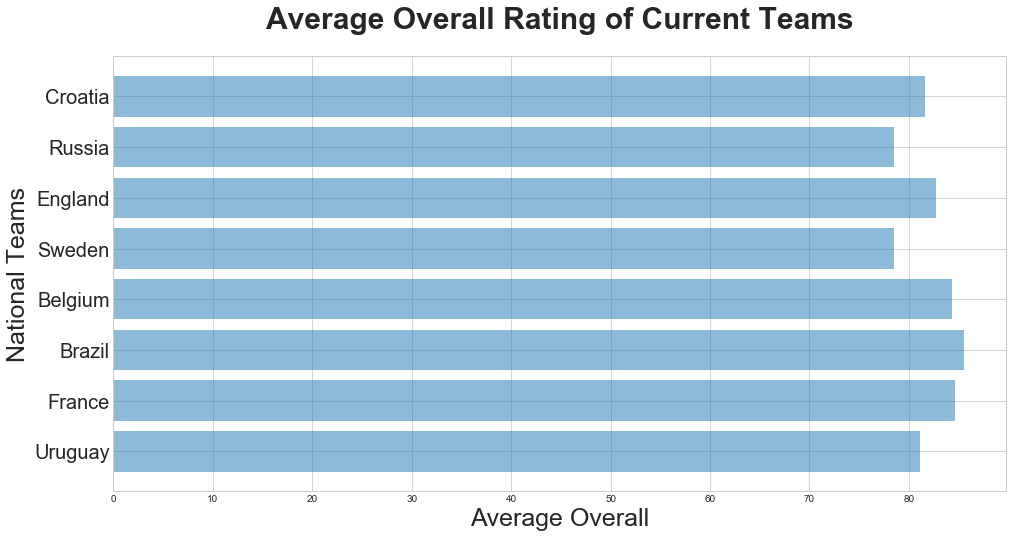

In [69]:
# 4 - Final Comparison
# Comparison between these top 8 qualified teams' line-ups w.r.t overall rating for FIFA World Cup 2018.

teams = ('Uruguay', 'France', 'Brazil', 'Belgium', 'Sweden', 'England', 'Russia', 'Croatia')
index = np.arange(len(teams))
average_overall = [81.1, 84.6, 85.5, 84.3, 78.5, 82.7, 78.5, 81.6]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.title('Average Overall Rating of Current Teams', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

In [70]:
# Conclusion:
# Brazil has the highest average overall rating, followed by France, Belgium & England.
# Based on Overall:: Brazil > France > Belgium > England > Croatia > Uruguay > Russia, Sweden
# There's a high chance for either one of Brazil, France, Belgium or England to be in the finals.

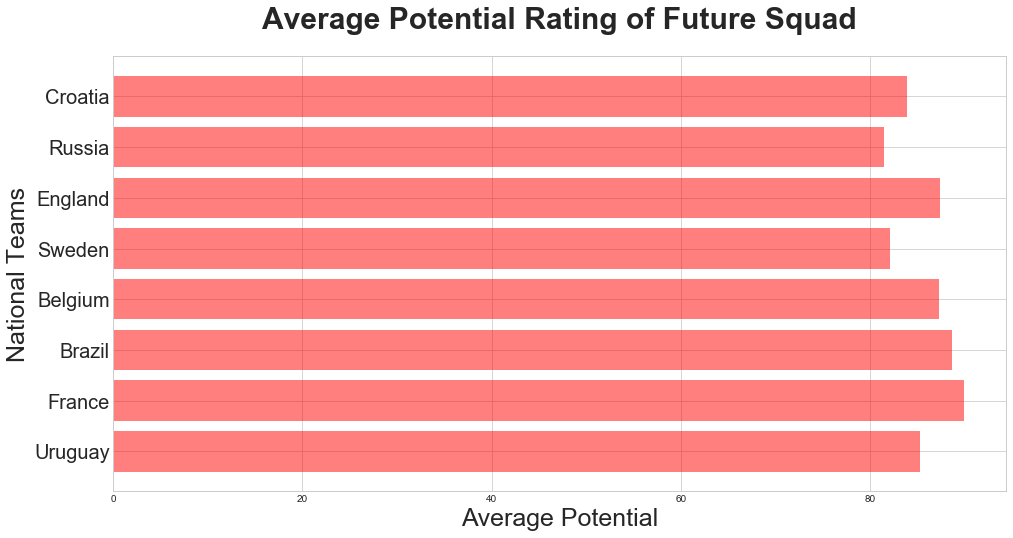

In [71]:
# Comparison between the top 8 qualified teams' line-ups w.r.t potential rating.

average_potential = [85.3, 89.9, 88.7, 87.3, 82.1, 87.4, 81.5, 83.9]

plt.figure(figsize=(16,8))
plt.barh(index, average_potential, align='center', alpha=0.5, color='red')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Potential', fontsize=25)
plt.title('Average Potential Rating of Future Squad', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

In [72]:
# Conclusion:
# France has the highest average potential rating, followed by Brazil, England & .
# Based on Overall:: France > Brazil > England > Belgium > Uruguay > Croatia > Sweden > Russia
# There's a high chance for either one of France, Brazil, England or Belgium to be in the finals.
# Well, as we know Brazil didn't make the cut but it seems there's some truth to the Potential ratings.
# Hence, we shall base the prediction models on Potential to check how credible it really is and how it gets calculated.

In [2]:
exit